<a href="https://colab.research.google.com/github/ZeroJoon2/DeepLearning/blob/main/2_%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### and w1 * x1  + w2 * x2 = y
1 / 1 = 1  
0 / 0 = 0  
0 / 1 = 0  
1 / 0 = 0  

In [ ]:
def AND(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.7 # 가중치
  tmp = x1 * w1 + x2 * w2
  if tmp <= theta:
    return 0
  elif tmp > theta:
    return 1


1

In [ ]:
print(f'''
0/0 : {AND(0,0)}
1/0 : {AND(1,0)}
0/1 : {AND(0,1)}
1/1 : {AND(1,1)}
''')


0/0 : 0
1/0 : 0
0/1 : 0
1/1 : 1



In [ ]:
def OR(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.2 # 가중치
  tmp = x1 * w1 + x2 * w2
  if tmp <= theta:
    return 0
  elif tmp > theta:

    return 1

print(f'''
0/0 : {OR(0,0)}
1/0 : {OR(1,0)}
0/1 : {OR(0,1)}
1/1 : {OR(1,1)}
''')


0/0 : 0
1/0 : 1
0/1 : 1
1/1 : 1



In [ ]:
import numpy as np

def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7

  tmp = np.sum(x*w) + b

  if tmp <= 0:
    return 0

  else:
    return 1

In [ ]:
def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([-0.5, -0.5])
  b = -0.2

  tmp = np.sum(x*w) + b

  if tmp <= 0:
    return 0

  else:
    return 1

In [ ]:
print(f'''
0/0 : {AND(0,0)}
1/0 : {AND(1,0)}
0/1 : {AND(0,1)}
1/1 : {AND(1,1)}
''')

print(f'''
0/0 : {OR(0,0)}
1/0 : {OR(1,0)}
0/1 : {OR(0,1)}
1/1 : {OR(1,1)}
''')


0/0 : 0
1/0 : 0
0/1 : 0
1/1 : 1


0/0 : 0
1/0 : 0
0/1 : 0
1/1 : 0



In [ ]:
def NAND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([-0.5, -0.5])
  b = 0.7

  tmp = np.sum(x*w) + b

  if tmp <= 0:
    return 0

  else:
    return 1

In [ ]:
print(f'''
0/0 : {NAND(0,0)}
1/0 : {NAND(1,0)}
0/1 : {NAND(0,1)}
1/1 : {NAND(1,1)}
''')


0/0 : 1
1/0 : 1
0/1 : 1
1/1 : 0



### 다중 퍼셉트론
- 퍼셉트론은 입력과 출력이 있는 알고리즘이다.
- 입력을 정해진 규칙에 따라 계산해서 출력한다.
- 퍼셉트론은 가중치와 편향(바이어스)를 이용해서 매개변수로 설정한다.
- 퍼센트론 하나로 AND, OR 같은 논리 게이트를 구성할 수 있다 (선형)
- XOR 같은 복합논리는 퍼셉트론을 연결해서 처리한다 (비선형)
- XOR 2단 퍼셉트론으로 구성할 수 있다.


In [ ]:
def XOR(x1, x2):
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  y = AND(s1, s2)
  return y

In [ ]:
import numpy as np
print(f'''
0/0 : {XOR(0,0)}
1/0 : {XOR(1,0)}
0/1 : {XOR(0,1)}
1/1 : {XOR(1,1)}
''')


0/0 : 0
1/0 : 0
0/1 : 0
1/1 : 0



### MNIST 데이터셋으로 신경망 구성

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

In [ ]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

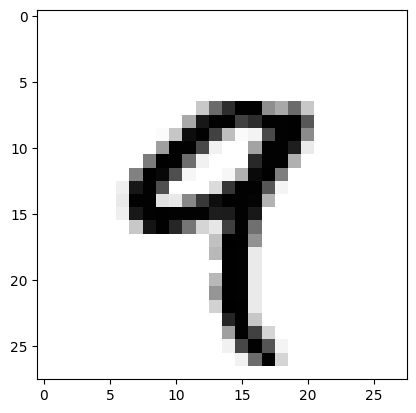

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_images[4], cmap = plt.cm.binary)
plt.show()


In [ ]:
n = 3
batch = train_images[128*n:128*(n+1)]

In [ ]:
import numpy as np
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print(f'numpy 걸린시간 {time.time() - t0}')

def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print(f'일반 계산 {time.time() - t0}')


numpy 걸린시간 0.008088111877441406
일반 계산 2.3108742237091064


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model= keras.Sequential([
    layers.Dense(512, activation = 'relu')
    , layers.Dense(10, activation = 'softmax')
    ])

model

<Sequential name=sequential_2, built=False>

In [ ]:
model.compile(
    optimizer = 'rmsprop'
    , loss = 'sparse_categorical_crossentropy'
    , metrics = ['accuracy']
)

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

model.fit(train_images
          , train_labels
          , epochs = 5
          , batch_size = 128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8751 - loss: 0.4414
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9663 - loss: 0.1170
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9787 - loss: 0.0729
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9850 - loss: 0.0522
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9890 - loss: 0.0364


In [ ]:
test_digit = test_images[0:10]
predictions = model.predict(test_digit)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


array([2.5680077e-08, 1.7176478e-09, 6.2733066e-06, 1.7833660e-04,
       1.6735039e-11, 1.3991099e-08, 2.7581297e-12, 9.9981511e-01,
       1.2156883e-08, 2.7191490e-07], dtype=float32)

In [ ]:
predictions[0].argmax()

7

In [ ]:
test_labels[0]

7

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_loss, test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9761 - loss: 0.0795


(0.06698553264141083, 0.9799000024795532)